In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
import matplotlib.pyplot as plt

#Contexto
Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).
Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/WoMakersCode/RRLNbvGQQtu5fPdxzFPI_populacao_brasileira.csv.csv')

In [12]:
df.head(10)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
6,6,DF,56,Médio,Intermediário,528.36,F
7,7,DF,36,Superior,Avançado,2203.10,F
8,8,PI,40,Fundamental,Básico,3577.07,F
9,9,AP,28,Superior,Avançado,2796.95,M


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info() #Não temos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


###1. Considere pessoas fluentes em inglês. Qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês? Considere fluente quem tem o nível avançado.

**Resposta**: 65,6%

In [ ]:

amostra = df[df['nível de proficiência em inglês'] != 'Avançado'].shape[0]
amostra

656

In [ ]:
espaco_amostral = df.shape[0]
espaco_amostral

1000

In [ ]:
probab_complementar = (amostra/espaco_amostral)*100
probab_complementar

65.60000000000001

In [ ]:
#Utilizando a função de massa da probabilidade da distribuição binomial
binom.pmf(1, 1, amostra/espaco_amostral)

0.656

###2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?
**Resposta**: 5,1%

In [ ]:
#espaço amostral: pessoas do AL e do PA
#condição: ter renda superior a 5 mil

espaco_amostral = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]
espaco_amostral.shape[0]

79

In [ ]:
amostra = espaco_amostral[espaco_amostral['renda'] > 5000]
amostra.shape[0]

4

In [ ]:
probab = (amostra.shape[0]/espaco_amostral.shape[0])*100
probab

5.063291139240507

##3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

**Resposta**: 0,08

In [ ]:
df.escolaridade.unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [ ]:
#Probabilidade de uma pessoa ter ensino superior completo no Amazonas (considerei ensino superior apenas, não incluindo pós-graduação): 23,7%
amostra = df[(df['estado'] == 'AM') & ((df['escolaridade'] == 'Superior') | (df['escolaridade'] == 'Pós-graduação'))].shape[0]
#espaço amostral: população do estado do Amazonas
espaco_amostral = df[df['estado'] == 'AM'].shape[0]

probab = (amostra/espaco_amostral)
probab

0.5526315789473685

In [ ]:
probabilidade = stats.geom.pmf(k=5, p=probab)
probabilidade

0.022135890467222828

##4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

####Pelo gráfico plotado percebemos que a faixa de renda com maior densidade é a de 3.000 reais a 4.500 reais.

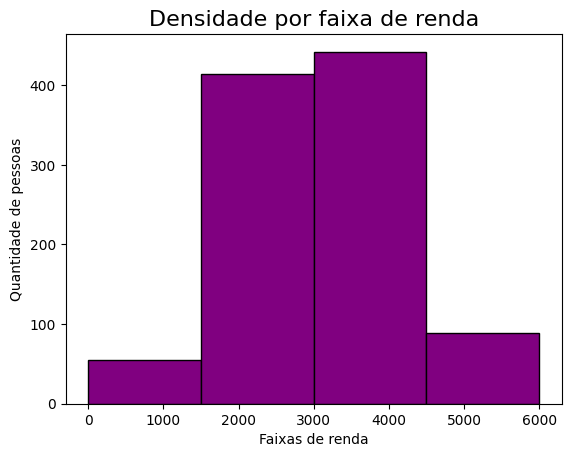

In [ ]:
renda_min = df['renda'].min()
renda_max = df['renda'].max()
faixas = np.arange(0, renda_max + 1500, 1500)
plt.hist(df['renda'], bins = faixas, color = 'purple', edgecolor = 'black')

plt.xlabel('Faixas de renda')
plt.ylabel('Quantidade de pessoas')
plt.title('Densidade por faixa de renda', fontsize = 16)

plt.show()

##5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, incluindo o gráfico.

In [ ]:
media = df['renda'].mean()
variancia = df['renda'].var()
print(f'A média é {media:.2f} e a variância é {variancia:.2f}.')

A média é 3082.54 e a variância é 993156.23.


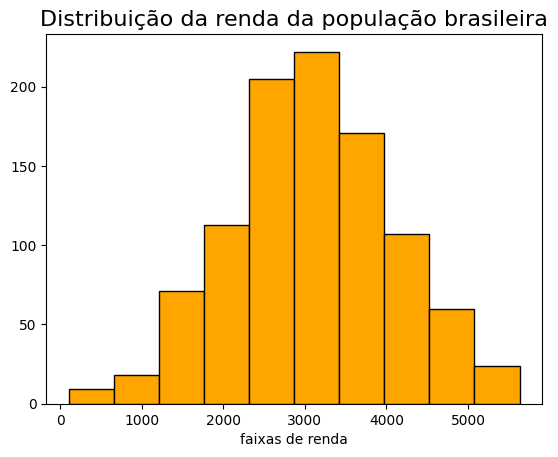

In [ ]:
plt.hist(df['renda'], bins = 10, color = 'orange', edgecolor = 'black')

plt.title('Distribuição da renda da população brasileira', fontsize = 16)
plt.xlabel('faixas de renda')
plt.show()

##6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

**Resposta:** Há 2,25% de chance de encontrar uma pessoa com pós-graduação em nosso dataset.

In [ ]:
prop = len(df[df['escolaridade'] == 'Pós-graduação'])/len(df)

In [ ]:
stats.binom.pmf(243, 1000, prop)

0.022515178317096114

##7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
df.escolaridade.unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [5]:
prob_fundamental =len(df[df['escolaridade'] == 'Fundamental'])/len(df)
prob_superior =len(df[df['escolaridade'] == 'Superior'])/len(df)
prob_medio =len(df[df['escolaridade'] == 'Médio'])/len(df)
prob_pg =len(df[df['escolaridade'] == 'Pós-graduação'])/len(df)

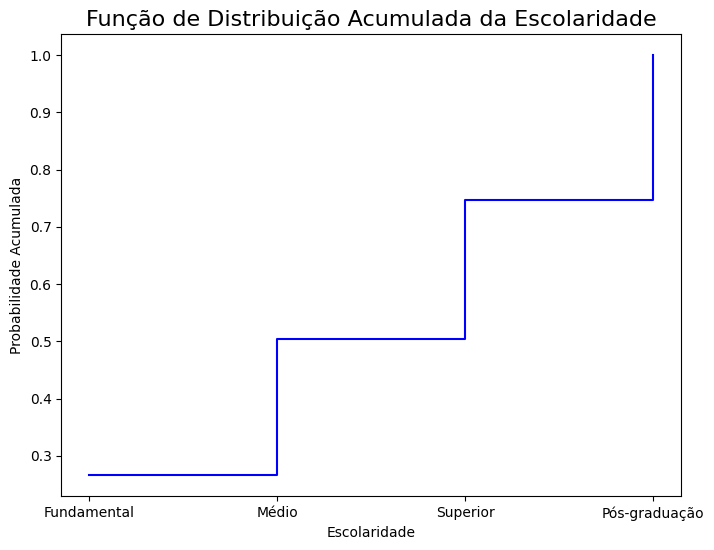

In [6]:
escolaridades = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']
probabilidades = np.array([prob_fundamental, prob_medio, prob_superior, prob_pg])

# Calculando a CDF usando a soma cumulativa das probabilidades
cdf_probabilidades = np.cumsum(probabilidades)

# Criando o gráfico de CDF
plt.figure(figsize = (8,6))
plt.step(escolaridades, cdf_probabilidades, where='post', color='blue') #O parâmetro where='post' indica que o degrau é colocado após o ponto de dados, alinhando a função degrau com os valores discretos.


# Adicionando título e rótulos aos eixos

plt.title('Função de Distribuição Acumulada da Escolaridade', fontsize = 16)
plt.xlabel('Escolaridade')
plt.ylabel('Probabilidade Acumulada')

# Exibindo o gráfico
plt.show()

##8. Qual a margem de erro amostral da proporção populacional, considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
#Encontrando a proporção de pessoas com nível de inglês intermediário

proporcao_amostral = len(df[df['nível de proficiência em inglês'] == 'Intermediário'])/len(df)
proporcao_amostral

0.329

In [ ]:

#Proporção amostral (p)
p = proporcao_amostral

# O tamanho da amostra (n)
n = len(df)

# Nível de confiança desejado: 95%
confianca = 0.95

# Encontrando o escore Z correspondente ao nível de confiança
# Para um nível de confiança de 95%, o escore Z é aproximadamente 1.96
z = stats.norm.ppf((confianca + 1) / 2)

# Calculando a margem de erro
margem_de_erro = z * np.sqrt((p * (1 - p) / n))

margem_de_erro

0.029121068108804226

##9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
media_renda = df.renda.mean()
media_renda

#p = pop_alvo.shape[0]/df.shape[0]
#p
#probab = stats.binom.pmf(60, len(df), p)
#probab

3082.5371800000003

In [ ]:
pop_alvo = df[df['renda'] == (round(media_renda) + 1000)]
len(pop_alvo)

0

####Como podemos ver, não existem pessoas com renda exatamente igual a 1000 reais acima da média. Então a probabilidade de encontrá-las é 0. Como alternativa ao que é proposto no exercício, vou calcular a probabilidade de encontrar pessoas com renda superior à média.

In [ ]:
pop_alvo = df[df['renda'] > ((round(media_renda)) + 1000)]
len(pop_alvo)

161

In [ ]:
len(df)

1000

In [ ]:
#len(pop_alvo)/len(df)

probab = stats.binom.pmf(60, len(df), len(pop_alvo)/len(df))
probab

1.099520565163774e-22

####A probabilidade é um número muuuuito pequeno: 2.0371005405985087e-201

###10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

**Resposta:** 1,9%

In [ ]:
df.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [ ]:
df.estado.unique()

array(['MA', 'BA', 'AM', 'CE', 'SE', 'DF', 'PI', 'AP', 'AC', 'SC', 'SP',
       'GO', 'RO', 'PA', 'MS', 'RN', 'RS', 'RR', 'PR', 'MG', 'MT', 'TO',
       'PB', 'PE', 'RJ', 'AL', 'ES'], dtype=object)

In [8]:
# P(A ∩ B ∩ C ∩ D) = P(A)×P(B)×P(C)×P(D)
df_se =  df[(df['estado'] == 'RJ')|(df['estado'] == 'SP')|(df['estado'] == 'MG')|(df['estado'] == 'ES')]


In [9]:
x = len(df_se[(df_se['sexo'] == 'M') & (df_se['renda'] > 2000) & (df_se['escolaridade'] == 'Fundamental')])

In [11]:
prob = (x/len(df))*100
prob

1.9